In [1]:
# Import 'pandas'
import pandas as pd

# Import 'numpy'
import numpy as np

# Import 'matplotlib.pyplot'
import matplotlib.pyplot as plt

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

In [2]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [3]:
# Import 'make_scorer', 'KNeighborsRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = KNeighborsRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'n_neighbors':[3,4,5,6,7], 'leaf_size':[20,30,50,100], 'weights':['uniform','distance']}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [4]:
# Import PCA
from sklearn.decomposition import PCA

def pca_projection(good_data, n_components):
    
    # Apply PCA by fitting the good data with only two dimensions
    pca = PCA(n_components=n_components).fit(good_data)

    # Transform the good data using the PCA fit above
    reduced_data = pca.transform(good_data)

    # Create a DataFrame for the reduced data
    columns = ['Dimension 1', 'Dimension 2', 'Dimension 3']

    return pd.DataFrame(reduced_data, columns=columns[:n_components]), pca

In [5]:
# Allows the use of display() for DataFrames
from IPython.display import display

# Read the data.
raw_data = pd.read_csv('eeg_performance_data.csv')

# Split the data into features and target label
target_raw = raw_data[raw_data.columns[-1]]
features_raw = raw_data.drop(raw_data.columns[-1], axis = 1)

# Print data shape. 
print("The shape of the data: {}".format(raw_data.shape))

# Success - Display the first fifteen records
display(raw_data.head(n=15))

The shape of the data: (60, 71)


,delta ch(1),theta ch(1),alpha ch(1),beta ch(1),gamma ch(1),delta ch(2),theta ch(2),alpha ch(2),beta ch(2),gamma ch(2),...,theta ch(13),alpha ch(13),beta ch(13),gamma ch(13),delta ch(14),theta ch(14),alpha ch(14),beta ch(14),gamma ch(14),performance
0,159.350841,30.129722,45.791643,19.955422,10.665023,412.299784,58.119193,87.302641,39.206394,7.345827,...,30.984135,46.388357,26.648098,5.372805,284.225065,64.848240,103.227529,45.648920,11.949323,81
1,73.874430,27.095788,43.338920,19.880751,10.962849,446.476159,52.365752,87.700639,39.472101,8.447510,...,32.534710,34.933984,28.055405,7.414582,217.407538,58.078777,83.224064,43.913646,11.031309,69
2,164.671493,33.861016,49.034350,27.535155,11.521218,605.542208,35.873985,56.255178,35.226651,7.322544,...,22.975597,35.371908,27.534804,5.575950,270.752041,39.480390,72.101447,45.334826,11.946557,69
3,421.554952,48.743904,45.666300,28.702596,10.598936,3241.129508,218.094497,95.749726,92.829349,16.549332,...,28.891130,38.651312,30.462861,5.173030,351.285243,54.583593,81.094637,51.001093,10.886431,62
4,326.267129,41.769691,46.676500,23.212800,10.482420,1020.681882,108.706422,79.197597,73.302135,16.969277,...,26.835372,50.934103,25.267342,5.759704,303.385319,50.407164,93.637385,38.360277,12.171409,88
5,225.331669,42.146634,58.183932,25.735090,10.427991,1333.527128,98.291157,89.349312,51.978115,11.761139,...,40.997199,49.322553,38.470406,7.074512,502.212706,62.756986,94.386519,44.829154,11.199858,81
6,206.594822,42.918903,52.878818,27.103613,10.584649,1185.545920,123.524016,91.586688,56.074072,13.141506,...,40.517073,50.863846,32.078611,5.973784,428.680948,74.071361,98.185071,47.073928,11.774449,81
7,229.742506,67.541676,50.810132,28.544045,11.065145,449.348775,58.244980,63.706904,37.704612,8.251595,...,50.490819,60.148814,31.114193,6.911391,368.358339,87.843083,105.602690,50.106684,12.874950,81
8,201.337633,40.815796,65.898949,31.505028,11.297358,926.888268,117.765180,116.550750,80.461241,13.695533,...,42.541894,67.500234,34.818138,6.133702,334.322592,70.516545,116.928660,53.356204,12.650636,75
9,121.093097,29.588135,71.673390,29.046671,12.947612,532.729818,78.853020,88.033174,78.375979,18.727531,...,31.982960,59.737721,33.345609,8.478941,250.401838,56.146085,119.823151,52.775212,15.742667,88


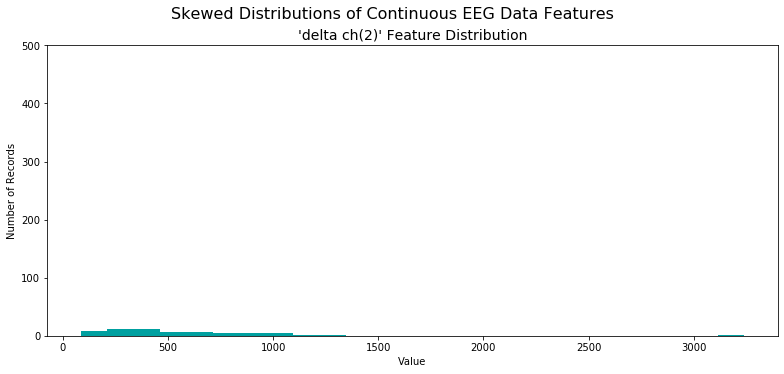

In [6]:
# Visualize skewed continuous features of original data
vs.distribution(raw_data, 6)

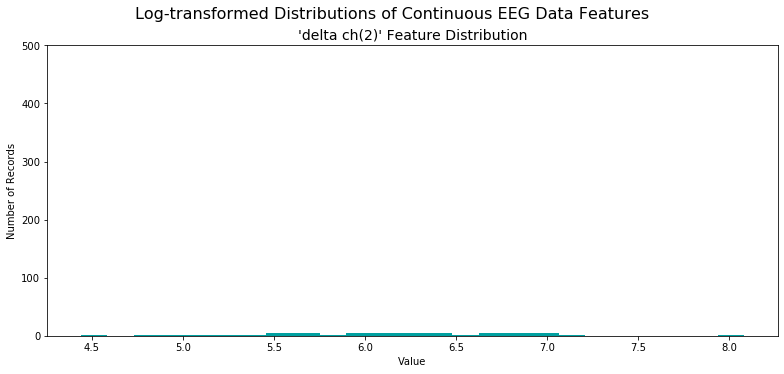

In [7]:
# Log-transform the skewed features
features_log_transformed = features_raw.apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, 6, transformed = True)

In [8]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

features_log_minmax_transform_out = pd.DataFrame(scaler.fit_transform(features_log_transformed), columns=features_raw.columns)

# Show an example of a record with scaling applied
display(features_log_minmax_transform_out.head())

,delta ch(1),theta ch(1),alpha ch(1),beta ch(1),gamma ch(1),delta ch(2),theta ch(2),alpha ch(2),beta ch(2),gamma ch(2),...,delta ch(13),theta ch(13),alpha ch(13),beta ch(13),gamma ch(13),delta ch(14),theta ch(14),alpha ch(14),beta ch(14),gamma ch(14)
0,0.257368,0.285553,0.240005,0.381368,0.080043,0.435136,0.456056,0.505787,0.466827,0.087701,...,0.227131,0.160076,0.163428,0.051811,0.038779,0.360141,0.296139,0.351211,0.220458,0.038871
1,0.015432,0.231376,0.214067,0.379063,0.094772,0.456924,0.413541,0.508603,0.470971,0.131118,...,0.067406,0.186371,0.018790,0.102021,0.140017,0.239894,0.230110,0.236881,0.171267,0.005498
2,0.267738,0.345364,0.272284,0.580706,0.121422,0.540332,0.260041,0.234521,0.401250,0.086722,...,0.209487,0.000000,0.025122,0.083736,0.050209,0.338342,0.000000,0.160892,0.211691,0.038774
3,0.565193,0.533197,0.238712,0.606595,0.076724,1.000000,1.000000,0.562987,1.000000,0.347962,...,0.437349,0.122486,0.070249,0.182526,0.027177,0.455271,0.192991,0.223142,0.361400,0.000000
4,0.484010,0.453388,0.249030,0.474654,0.070826,0.683324,0.712780,0.445507,0.853196,0.356243,...,0.222966,0.082909,0.211311,0.000000,0.060248,0.389431,0.145448,0.299424,0.000000,0.046589


In [9]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Assign preprocessed data frame to 'good_data'.
good_data = features_log_minmax_transform_out

# Assign the features to the variable Bands, and the labels to the variable state.
Bands = np.array(good_data)
state = np.array(target_raw)

# Shuffle and split the data into training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(Bands, state, test_size=0.2, random_state=42, shuffle=True)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


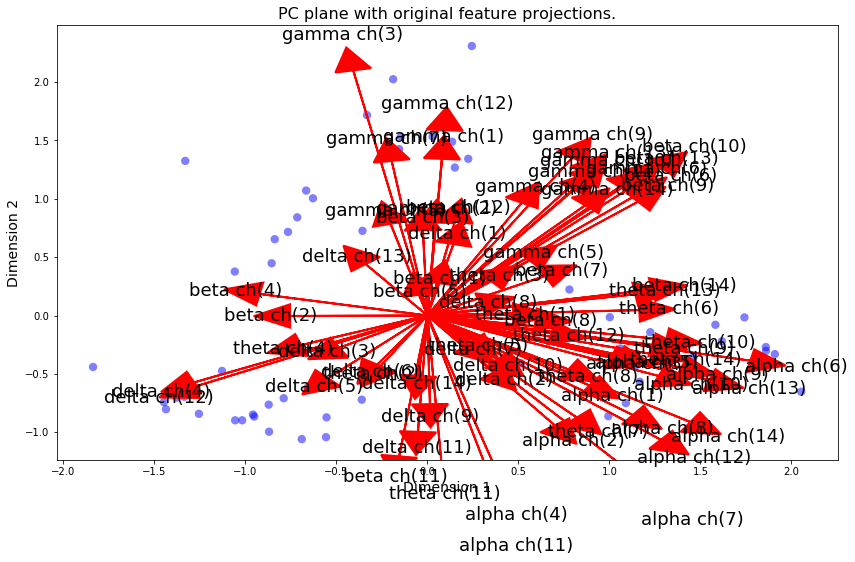

In [10]:
# Project data on two dimensions
reduced_data, pca = pca_projection(good_data, 2)

# Create a biplot
vs.biplot(good_data, reduced_data, target_raw, pca)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

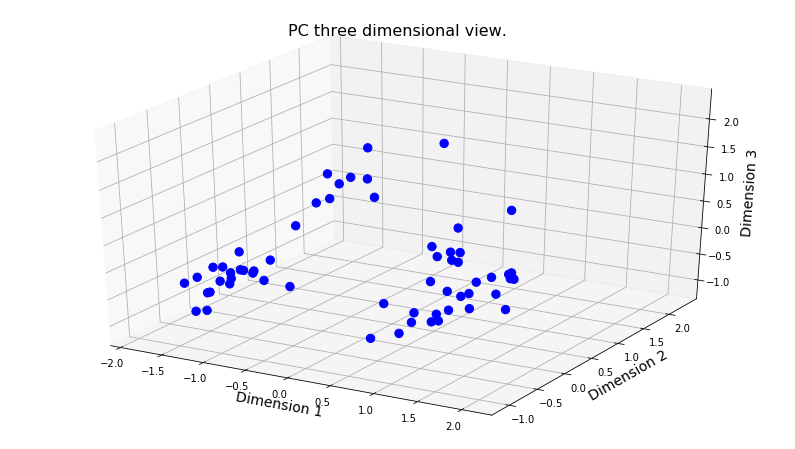

In [11]:
# Project data on three dimensions
reduced_data, pca = pca_projection(good_data, 3)

# Enabling the `widget` backend.
%matplotlib widget

# Create a triplot
vs.triplot(reduced_data, target_raw, pca)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

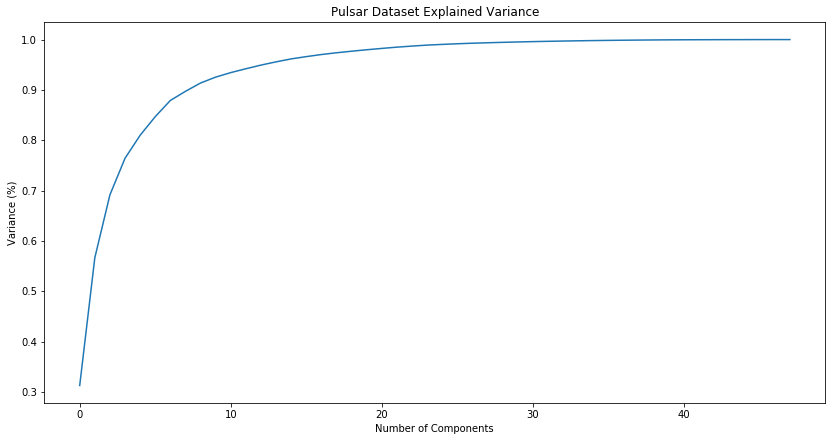

In [12]:
# Fitting the PCA algorithm with our training data.
pca = PCA().fit(X_train)

# Plotting the Cumulative Summation of the Explained Variance.
plt.figure(figsize = (14,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # For each component.
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [13]:
# Import time
from time import time

# From the Explained Variance graph.
n_components = 25

print( "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]) )
t0 = time()

# Create an instance of PCA, initializing with n_components=n_components and whiten=True
pca = PCA(n_components=n_components)

# Pass the training dataset (X_train) to pca's 'fit()' method
pca = pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Explained variance ratios:", pca.explained_variance_ratio_*100)
print("Cumulative explained variance ratio: %0.3f %%" % (sum(pca.explained_variance_ratio_)*100))
print("done in %0.3fs" % (time() - t0))

Extracting the top 25 eigenfaces from 48 faces
Explained variance ratios: [31.28284094 25.38028991 12.49877119  7.26817511  4.56178621  3.7011979
  3.2186869   1.81269791  1.65154768  1.16792218  0.89804201  0.76521053
  0.72522818  0.64581052  0.58705393  0.45092856  0.41553495  0.34966007
  0.30985513  0.28751158  0.26524716  0.25378802  0.21135684  0.19366371
  0.14050992]
Cumulative explained variance ratio: 99.043 %
done in 0.005s


In [14]:
# Fit the training data to the model using grid search
model = fit_model(X_train_pca, y_train)

# Produce the value for 'n_neighbors', 'leaf_size' and 'weights'
print("Parameter 'n_neighbors' is {} for the optimal model.".format(model.get_params()['n_neighbors']))
print("Parameter 'leaf_size' is {} for the optimal model.".format(model.get_params()['leaf_size']))
print("Parameter 'weights' is {} for the optimal model.".format(model.get_params()['weights']))

Parameter 'n_neighbors' is 7 for the optimal model.
Parameter 'leaf_size' is 20 for the optimal model.
Parameter 'weights' is distance for the optimal model.


In [15]:
# Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X_test_pca)

# Show predictions
for i, performance in enumerate(y_pred):
    print("Predicted performance for test {}'s bands: {}".format(i+1, round(performance,2)))

Predicted performance for test 1's bands: 73.33
Predicted performance for test 2's bands: 74.37
Predicted performance for test 3's bands: 96.33
Predicted performance for test 4's bands: 35.16
Predicted performance for test 5's bands: 75.72
Predicted performance for test 6's bands: 26.35
Predicted performance for test 7's bands: 96.28
Predicted performance for test 8's bands: 35.71
Predicted performance for test 9's bands: 70.31
Predicted performance for test 10's bands: 21.09
Predicted performance for test 11's bands: 34.81
Predicted performance for test 12's bands: 25.55


In [16]:
# Calculate the R2 score and assign it to the variable score.
score = r2_score(y_test, y_pred)

# Print score.
print("R2 score: %0.1f %%" %(score*100))

R2 score: 82.6 %


In [17]:
# Import 'pickle'
import pickle

# Save the model to disk.
pickle.dump(model, open('finalized_model.sav', 'wb'))
# Save PCA transformation.
pickle.dump(pca, open("pca.pkl", "wb"))
# Save scaler mapping values.
pickle.dump(scaler, open('scaler.sav', 'wb'))